import library

In [1]:
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import twitter_samples

download the require library for preprocessing
*   stopwords
*   twitter_samples



In [2]:
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Umang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

Preprocess the data into stem form
Preprocess Steps:
*   Eliminate handles and urls.
*   Remove stopwords "and","is",etc.
*   Tokenize the string into words.
*   Stemming conversion.
*   Convert all word into lowercase.








In [3]:
def process_tweets(tweet_demo):
    tweet_demo = re.sub(r'^RT[\s]+', '', tweet_demo)
    tweet_demo = re.sub(r'https?://\S+', '', tweet_demo, flags=re.IGNORECASE)
    tweet_demo = re.sub(r'^#', '', tweet_demo)
    tweet_token = TweetTokenizer(strip_handles=True, reduce_len=True)
    tweet_demo = tweet_token.tokenize(tweet_demo)
    stop = stopwords.words('english')
    clean_tweet = []
    for i in tweet_demo:
        if i not in stop and i not in string.punctuation:
            clean_tweet.append(i)
    stemmer = PorterStemmer()
    cleaned_tweet = []
    for i in clean_tweet:
        cleaned_tweet.append(stemmer.stem(i))
    return cleaned_tweet

In [4]:
ans="We not like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI"
process_tweets(ans)

['we',
 'like',
 'keep',
 'love',
 'custom',
 'wait',
 'long',
 'we',
 'hope',
 'enjoy',
 'happi',
 'friday',
 'lwwf',
 ':)']

divide tweets into positive sentiment and negative sentiment

In [5]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

load the data positive tweet and negative tweet

In [6]:
test_pos = pos_tweets[3500:]
train_pos = pos_tweets[:3500]
test_neg = neg_tweets[3500:]
train_neg = neg_tweets[:3500]
X_train = train_pos + train_neg
X_test = test_pos + test_neg

generate label for extracted words(features)

In [7]:
y_train=np.append(np.ones((len(train_pos),1)),np.zeros((len(train_neg),1)),axis=0)
y_test=np.append(np.ones((len(test_pos),1)),np.zeros((len(test_neg),1)),axis=0)

In [8]:
print(y_train.shape,y_test.shape)

(7000, 1) (3000, 1)


count the freuency how many times appears the word

In [9]:
frequency={}
listt=np.squeeze(y_train).tolist()
count=0
for i in range(len(X_train)):
  tt=process_tweets(X_train[i])
  for j in tt:
    #print(j,end=" ")
    key = (j, listt[i]) 
    if key not in frequency: frequency[key]=1
    else: frequency[key]+=1

In [13]:
count=0
for key,values in frequency.items():
  print(key,values)
  count+=1
  if(count==5): break

('followfriday', 1.0) 23
('top', 1.0) 29
('engag', 1.0) 6
('member', 1.0) 13
('commun', 1.0) 25


sigmoid function for non linearity method and gradient descent

why activation: Activation functions allow neural networks to model complex relationships between inputs and outputs. Without activation functions, the network would be limited to representing only linear relationships ,thats why we use activation.

why gradient descent: Gradient descent is an optimization algorithm used to minimize the cost or loss function in machine learning and deep learning models. The goal is to find the values of the model's parameters (weights and biases) that minimize the cost function.


In [14]:
def sigmoid(z):
    h = 1/(1+np.exp(-z))
    return h

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    m = X.shape[0]
    for i in range(0, iters):
        z = np.dot(X,theta)
        Z = sigmoid(z)
        J = (-1*(np.dot(y.T,np.log(Z))+np.dot(1-y.T,np.log(1-Z))))/m
        theta = theta-((alpha/m)*np.dot(X.T,Z-y))
    return J, theta

In [16]:
def extract_features(tweet, freqs):
    words = process_tweets(tweet)
    weights = np.zeros(3)
    weights[0] = 1
    for word in words:
        weights[1] += freqs.get((word,1),0)
        weights[2] += freqs.get((word,0),0)
    weights=weights[None,:]
    return weights

sample for vector labelling

In [17]:
budd=extract_features('what is  up buddy?', frequency)
print(budd)

[[1. 4. 1.]]


**Train** the model

In [18]:
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i, :]= extract_features(X_train[i], frequency)
Y = y_train
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 2000)
print("Cost ",J)
print("Weights ",theta)

Cost  [[0.22203657]]
Weights  [[ 8.80857488e-08]
 [ 6.40869802e-04]
 [-6.20284105e-04]]


**Testing** tweet demo how algo predicts?

In [19]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet,freqs)
    y_pred = sigmoid(np.dot(x,theta))
    return y_pred

In [20]:
for tweet in ['The weather is beautiful today.', 'I feel awful.', 'The concert was a disappointment.',
              'I love this book!', 'The food was delicious.', 'The service was terrible.',
              'The vacation was amazing!', 'I hate Mondays.', 'The movie was boring and predictable.',
              'The party was a blast!']:
    prediction = predict_tweet(tweet, frequency, theta)
    sentiment="Positive"
    if(prediction<0.5): sentiment='Negative'
    print("%s -> %.9f -> %s" % (tweet, prediction,sentiment))

The weather is beautiful today. -> 0.507655591 -> Positive
I feel awful. -> 0.413898651 -> Negative
The concert was a disappointment. -> 0.504484634 -> Positive
I love this book! -> 0.459840536 -> Negative
The food was delicious. -> 0.503482222 -> Positive
The service was terrible. -> 0.503316865 -> Positive
The vacation was amazing! -> 0.507833240 -> Positive
I hate Mondays. -> 0.425748392 -> Negative
The movie was boring and predictable. -> 0.502618731 -> Positive
The party was a blast! -> 0.503327158 -> Positive


Accuracy of our model

In [21]:
def Accuracy(X_test, y_test, freqs):
    predicted = []
    for tweet in X_test:
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred >=0.5:
            predicted.append(1.0)
        else:
            predicted.append(0.0)
    accuracy = np.sum(np.array(predicted) == np.squeeze(y_test)) / len(X_test)
    return accuracy,predicted

In [22]:
accuracy,predicted = Accuracy(X_test,y_test, frequency)
print("accuray ",accuracy)

accuray  0.9813333333333333


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
print(cm)

[[1490   10]
 [  46 1454]]


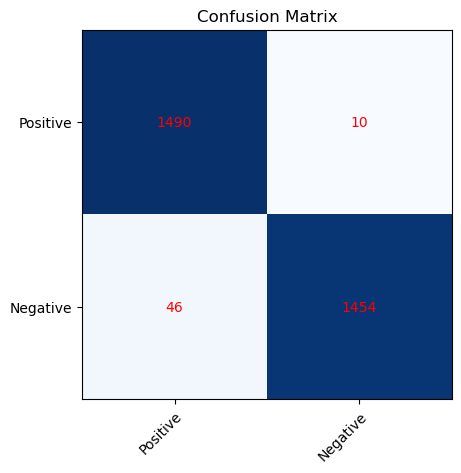

In [24]:
import matplotlib.pyplot as plt
import numpy as np
confusion_matrix = np.array([[1490, 10], [46, 1454]])
labels = ['Positive', 'Negative']
fig, ax = plt.subplots()
heatmap = ax.imshow(confusion_matrix, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='r')
ax.set_title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.metrics import precision_score,recall_score
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)

print("Precision:", int(precision*100),end="%\n")
print("Recall:", int(recall*100),end="%\n")

Precision: 99%
Recall: 96%


#### Precision of 99%: This means that out of all the instances predicted as positive by your model, 99% of them are actually positive. In other words, your model has a very low rate of false positives, indicating that it is accurate in identifying positive instances.
#### Recall of 96%: This means that out of all the actual positive instances, your model correctly identifies 96% of them as positive. In other words, your model has a low rate of false negatives, indicating that it captures a large portion of the positive instances.